In [1]:
import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expfolder = paths.results / "DictLr_Ncomps-4_PosCode-True_Alpha-2.0_Tvalue-15_Act-pos_n-34"
components = np.load(expfolder / paths.dictcomps_npy_name)
assignments = pd.read_pickle(expfolder / paths.comp_assignments_df_name).reset_index(level="frame_time")
display(components.shape)
assignments

(4, 23662)

block                     frame_time RetainedFrames DictComp            \
                                               type        0         1   
subj_name       ses_name                                                 
sub-CC00168XX12 ses-55700         20           high      0.0  4.962994   
                ses-55700         23           high      0.0  4.786978   
                ses-55700         24           high      0.0  3.296580   
                ses-55700         25           high      0.0  4.475443   
                ses-55700         27           high      0.0  4.784907   
...                              ...            ...      ...       ...   
sub-CC00192AN12 ses-64301       2251           high      0.0  0.000000   
                ses-64301       2261           high      0.0  0.000000   
                ses-64301       2269           high      0.0  1.510095   
                ses-64301       2276           high      0.0  0.274403   
                ses-64301       2285           high      0.0  0.000000   

block                                           
                                  2          3  
subj_name       ses_name                        
sub-CC00168XX12 ses-55700  5.704944   0.000000  
                ses-55700  2.117748   1.755669  
                ses-55700  0.000000   1.585688  
                ses-55700  7.888814  13.263262  
                ses-55700  2.294676  11.406625  
...                             ...        ...  
sub-CC00192AN12 ses-64301  0.000000   0.000000  
                ses-64301  0.000000   0.000000  
                ses-64301  0.000000   0.000000  
                ses-64301  1.513746   0.000000  
                ses-64301  0.000000   0.000000  

[11662 rows x 6 columns]

In [3]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos.columns = pd.MultiIndex.from_product([['metadata'], subjs_infos.columns])


assignments_metadata_df = assignments.join(subjs_infos, how='left')
assignments_metadata_df

frame_time RetainedFrames DictComp            \
                                               type        0         1   
subj_name       ses_name                                                 
sub-CC00168XX12 ses-55700         20           high      0.0  4.962994   
                ses-55700         23           high      0.0  4.786978   
                ses-55700         24           high      0.0  3.296580   
                ses-55700         25           high      0.0  4.475443   
                ses-55700         27           high      0.0  4.784907   
...                              ...            ...      ...       ...   
sub-CC00192AN12 ses-64301       2251           high      0.0  0.000000   
                ses-64301       2261           high      0.0  0.000000   
                ses-64301       2269           high      0.0  1.510095   
                ses-64301       2276           high      0.0  0.274403   
                ses-64301       2285           high      0.0  0.000000   

                                                  metadata                     \
                                  2          3 scan_number singleton sedation   
subj_name       ses_name                                                        
sub-CC00168XX12 ses-55700  5.704944   0.000000           1         S    False   
                ses-55700  2.117748   1.755669           1         S    False   
                ses-55700  0.000000   1.585688           1         S    False   
                ses-55700  7.888814  13.263262           1         S    False   
                ses-55700  2.294676  11.406625           1         S    False   
...                             ...        ...         ...       ...      ...   
sub-CC00192AN12 ses-64301  0.000000   0.000000           1         M    False   
                ses-64301  0.000000   0.000000           1         M    False   
                ses-64301  0.000000   0.000000           1         M    False   
                ses-64301  1.513746   0.000000           1         M    False   
                ses-64301  0.000000   0.000000           1         M    False   

                                      ...                        \
                           birth_age  ... qc_fmri_fieldmap_type   
subj_name       ses_name              ...                         
sub-CC00168XX12 ses-55700  40.142857  ...         spin_echo_epi   
                ses-55700  40.142857  ...         spin_echo_epi   
                ses-55700  40.142857  ...         spin_echo_epi   
                ses-55700  40.142857  ...         spin_echo_epi   
                ses-55700  40.142857  ...         spin_echo_epi   
...                              ...  ...                   ...   
sub-CC00192AN12 ses-64301  34.714286  ...        dual_echo_time   
                ses-64301  34.714286  ...        dual_echo_time   
                ses-64301  34.714286  ...        dual_echo_time   
                ses-64301  34.714286  ...        dual_echo_time   
                ses-64301  34.714286  ...        dual_echo_time   

                                                                               \
                          qc_fmri_dvars_z qc_fmri_tsnr_z qc_fmri_mcdc2sbref_z   
subj_name       ses_name                                                        
sub-CC00168XX12 ses-55700        0.794888       0.429339            -0.707725   
                ses-55700        0.794888       0.429339            -0.707725   
                ses-55700        0.794888       0.429339            -0.707725   
                ses-55700        0.794888       0.429339            -0.707725   
                ses-55700        0.794888       0.429339            -0.707725   
...                                   ...            ...                  ...   
sub-CC00192AN12 ses-64301       -1.324322      -1.439998             1.852760   
                ses-64301       -1.324322      -1.439998             1.852760   
                ses-6430

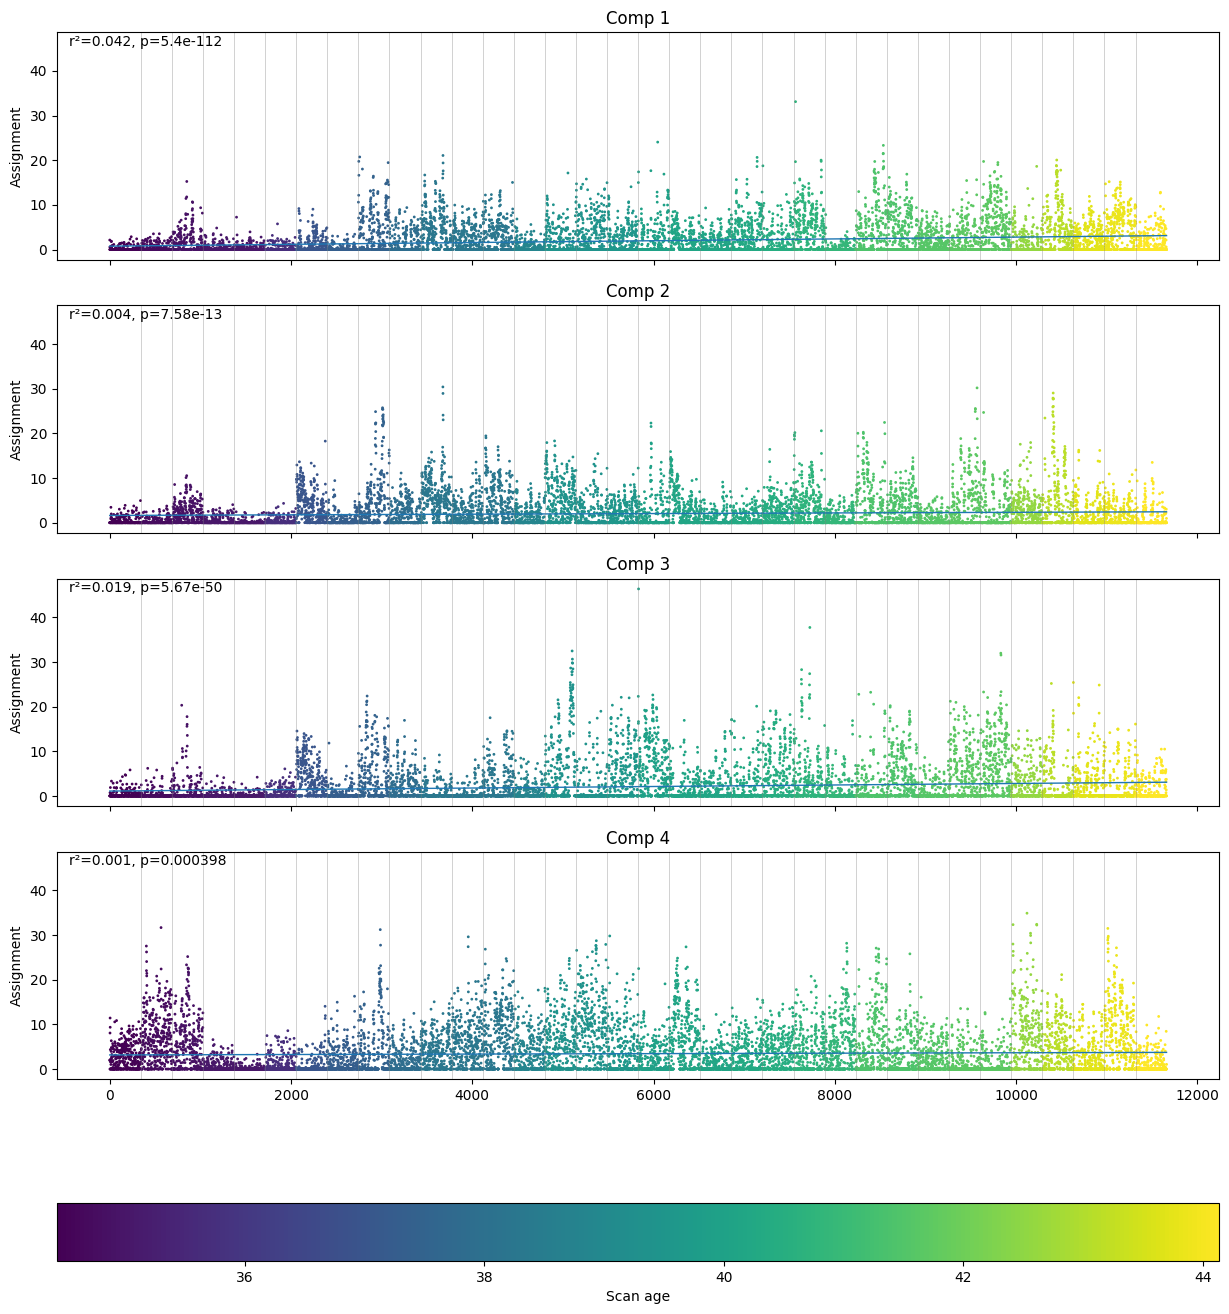

In [4]:
from scipy.stats import linregress

n_comps = components.shape[0]

fig, axes = plt.subplots(n_comps, 1, figsize=(15, 4 * n_comps), sharex=True, sharey=True)

age_sorted_assignments = assignments_metadata_df.sort_values(('metadata', 'scan_age'))

age_sorted_assignments = assignments_metadata_df.sort_values(by=[
    ('metadata', 'scan_age'),
    'subj_name'
])


codes = age_sorted_assignments["metadata", "scan_age"].values
subjects = age_sorted_assignments.index.get_level_values("subj_name")
change_points = np.where(subjects[:-1] != subjects[1:])[0] + 0.5



x = np.arange(len(codes))

for ax, comp in zip(axes, age_sorted_assignments["DictComp"].columns):
    y = age_sorted_assignments["DictComp"][comp].values

    sc = ax.scatter(x, y, c=codes, s=1)
    ax.set_ylabel("Assignment")
    ax.set_title(f"Comp {comp+1}")

    slope, intercept, r, p, stderr = linregress(x, y)
    r2 = r ** 2
    ax.plot(x, slope*x + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")


    for cp in change_points:
        ax.axvline(cp, color="gray", linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Scan age")
plt.show()


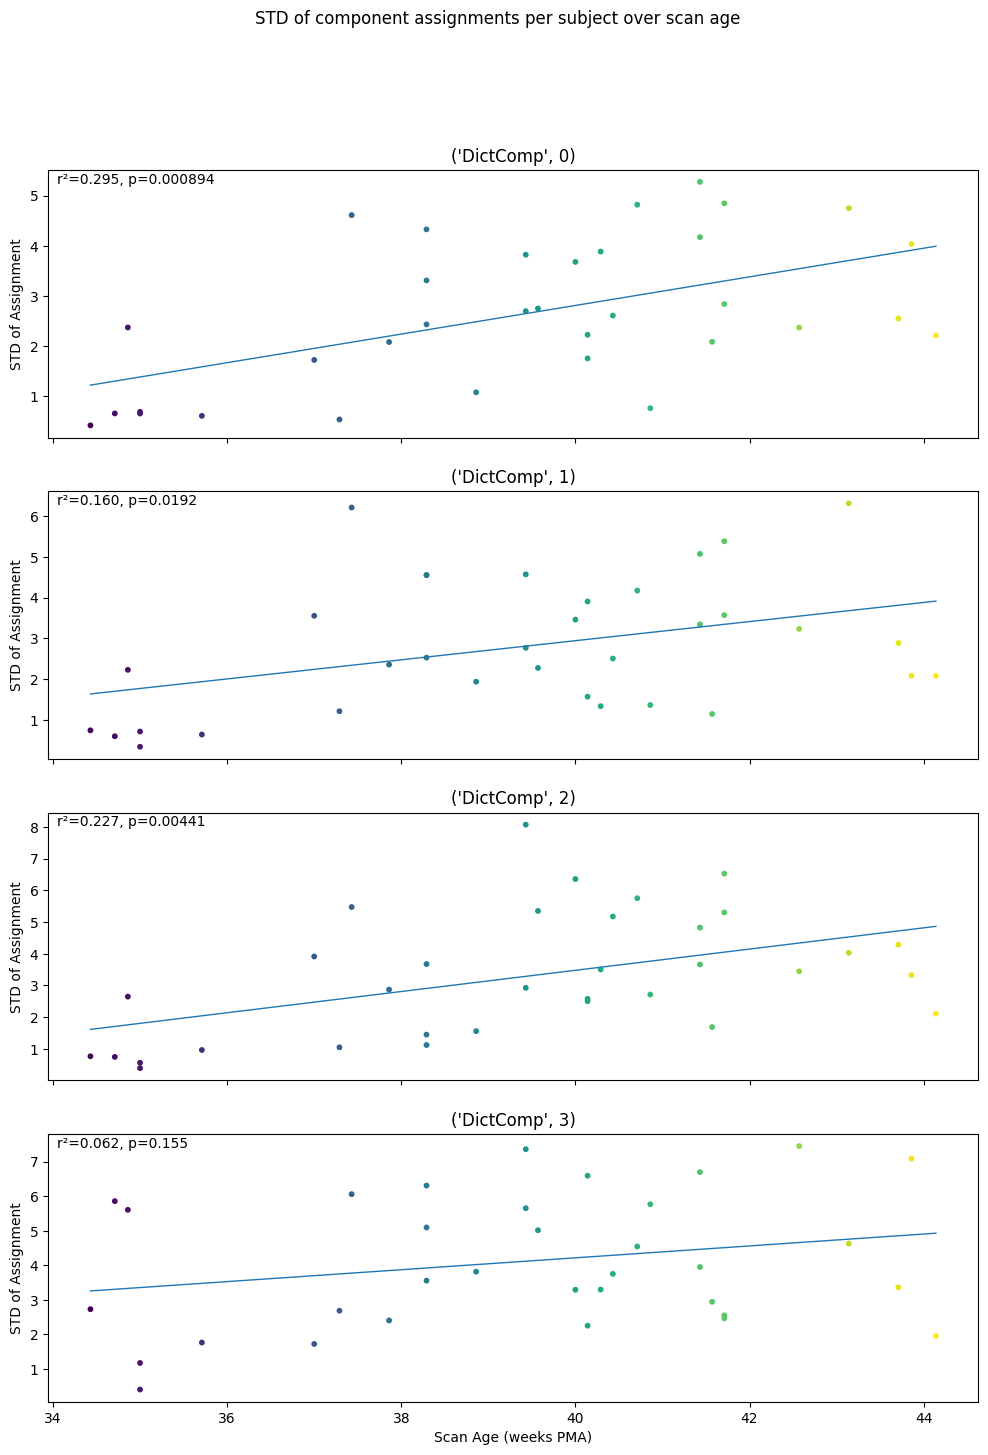

In [5]:
subjGrouped_ageSorted_assignments = age_sorted_assignments.groupby(
    level=['subj_name', 'ses_name'],
    sort=False
)["DictComp"]

fig, axes = plt.subplots(components.shape[0], 1, figsize=(12, 4 * components.shape[0]), sharex=True)
for ax,(comp_idx, comp_value) in zip(axes, subjGrouped_ageSorted_assignments.std().T.iterrows()):
    scan_ages = age_sorted_assignments["metadata", 'scan_age'].groupby(
        level=['subj_name', 'ses_name'],
        sort=False
    ).first().values
    ax.scatter(scan_ages, comp_value, s=10, c=scan_ages)


    slope, intercept, r, p, stderr = linregress(scan_ages, comp_value)
    r2 = r ** 2
    ax.plot(scan_ages, slope*scan_ages + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")

    ax.set_ylabel("STD of Assignment")
    ax.set_title(f"{comp_idx}")
fig.suptitle("STD of component assignments per subject over scan age")
plt.xlabel("Scan Age (weeks PMA)")
plt.show()

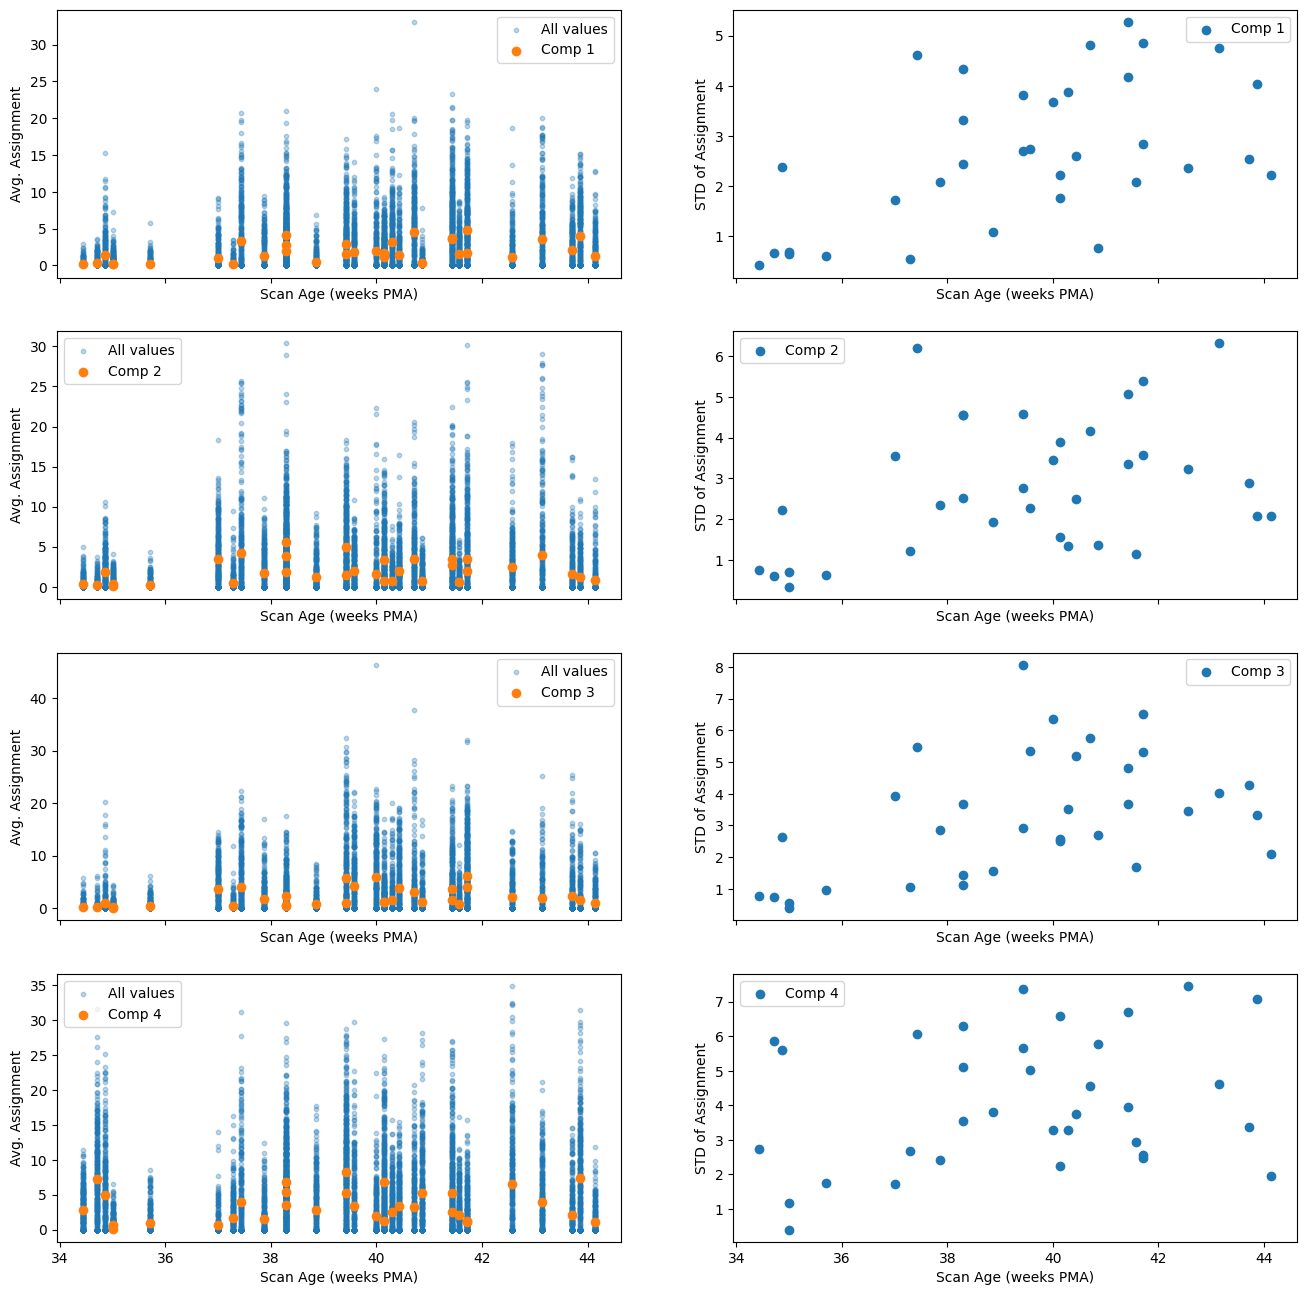

In [6]:
# plot assignments over age

scan_ages = age_sorted_assignments["metadata", 'scan_age']
perSubj_scan_ages = scan_ages.groupby(level=['subj_name', 'ses_name'], sort=False).first()

ageSorted_subjAveraged_compsAssignments = age_sorted_assignments["DictComp"].groupby(
    level=['subj_name', 'ses_name'],
    sort=False
).mean()

ageSorted_subjSTD_compsAssignments = age_sorted_assignments["DictComp"].groupby(
    level=['subj_name', 'ses_name'],
    sort=False
).std()


n_comps = components.shape[0]
fig, axes = plt.subplots(n_comps, 2, figsize=(16, 4 * n_comps), sharex=True, sharey=False)


for row_ax, com_series in zip(axes, ageSorted_subjAveraged_compsAssignments.columns):

    ax = row_ax[0]

    ax.scatter(
        scan_ages.values,
        age_sorted_assignments["DictComp"][com_series].values,
        alpha=0.3,
        s=10,
        label="All values"
    )

    ax.scatter(
        perSubj_scan_ages.values,
        ageSorted_subjAveraged_compsAssignments[com_series].values,
        label=f"Comp {com_series+1}"
    )

    ax.set_ylabel("Avg. Assignment")
    ax.set_xlabel("Scan Age (weeks PMA)")
    ax.legend()

    ax = row_ax[1]

    ax.scatter(
        perSubj_scan_ages.values,
        ageSorted_subjSTD_compsAssignments[com_series].values,
        label=f"Comp {com_series+1}"
    )

    ax.set_ylabel("STD of Assignment")
    ax.set_xlabel("Scan Age (weeks PMA)")
    ax.legend()

plt.show()
